In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cft

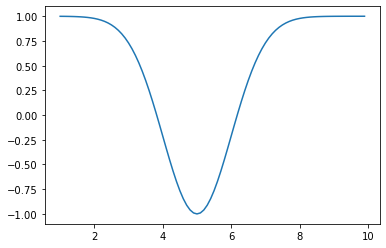

In [2]:
def neg_gaus(x, mu, sig, const, aa):
    yy = np.exp(-0.5*((x-mu)/sig)**2)
    zz = -aa*yy + const
    return zz

xy = np.arange(1,10,0.1)
plt.plot(xy, neg_gaus(xy, 5, 1, 1, 2))

<ErrorbarContainer object of 3 artists>

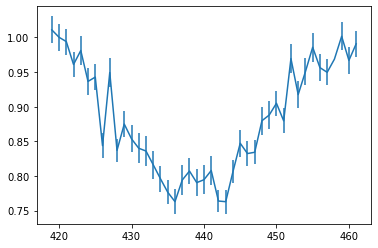

In [3]:
pix, fl, fle = np.loadtxt('data.dat', usecols=(0,1,2), unpack=True)
plt.errorbar(pix, fl, yerr=fle)

In [4]:
popt, pcov = cft(neg_gaus, pix, fl, sigma=fle)

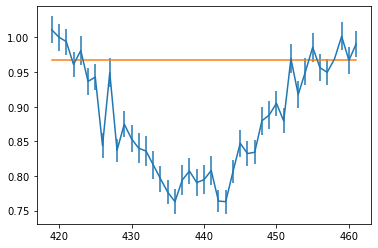

In [5]:
plt.errorbar(pix, fl, yerr=fle)
plt.plot(pix, neg_gaus(pix, *popt))

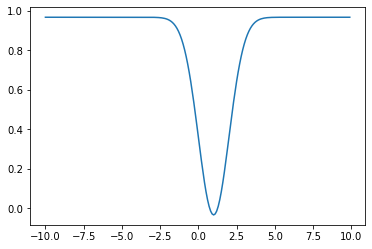

In [6]:
x1 = np.arange(-10,10,0.1)
plt.plot(x1, neg_gaus(x1,*popt))

[1.         1.         0.96717622 1.        ]


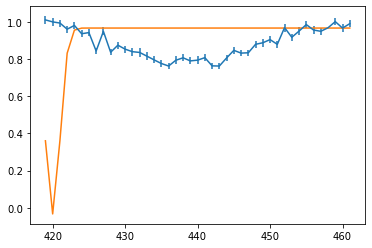

In [8]:
print(popt)
plt.errorbar(pix, fl, yerr=fle)
plt.plot(pix, neg_gaus(pix, popt[0] + pix[0], popt[1], popt[2], popt[3]))

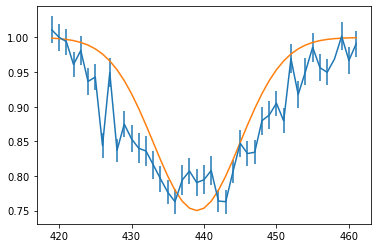

In [22]:
plt.errorbar(pix, fl, yerr=fle)
plt.plot(pix, neg_gaus(pix, 439, 6, 1, 0.25))

In [23]:
def min_log_likelihood(x):
    global pix, fl, fle
    model = neg_gaus(pix, x[0], x[1], x[2], x[3])
    chi2 = (fl - model)/fle
    chi22 = np.sum(chi2**2)
    yy = np.sum(np.log(fle)) + 0.5*chi22
    return yy

xinit = np.array([pix[0]+pix[-1]/2, 1, 1, 1])

from scipy.optimize import minimize as mz

soln = mz(min_log_likelihood, xinit, method='L-BFGS-B')
print(soln)

      fun: 652.0625413896255
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.        , 0.        , 0.00305818, 0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 100
      nit: 2
   status: 0
  success: True
        x: array([649.5       ,   1.        ,   0.96717621,   1.        ])


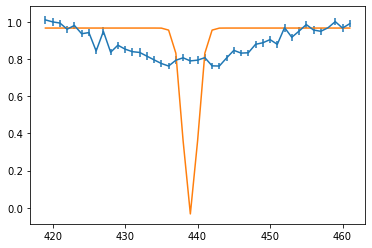

In [25]:
xx = soln.x
xx[0] = 439
plt.errorbar(pix, fl, yerr=fle)
plt.plot(pix, neg_gaus(pix, *xx))

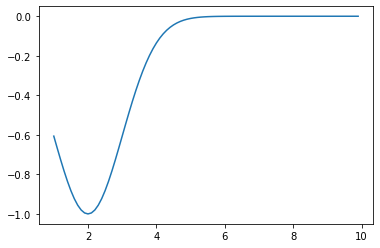

In [26]:
def neg_gaussian(x, a, b, c):
    ab = (x-a)/b
    xx = np.exp(-0.5*ab**2)
    cd = c*xx
    return -cd

plt.plot(xy, neg_gaussian(xy, 2, 1, 1))

In [32]:
def min_like(x):
    global pix, fl, fle
    model = neg_gaussian(pix, x[0], x[1], x[2])
    chi = (fl - model)/fle
    chi2 = np.sum(-0.5*chi**2)
    ll = np.sum(np.log(fle))
    return ll - chi2

xnit1 = np.array([(pix[0] + pix[-1])/2, 1, 1, 1])
slon1 = mz(min_log_likelihood, xnit1, method='L-BFGS-B')
print(slon1)

      fun: -135.40117178046336
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.52651283e-05,  1.13686838e-04, -9.68611857e-03,  7.19353466e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 495
      nit: 77
   status: 0
  success: True
        x: array([4.38797969e+02, 9.09745416e+00, 9.92235227e-01, 2.17724021e-01])


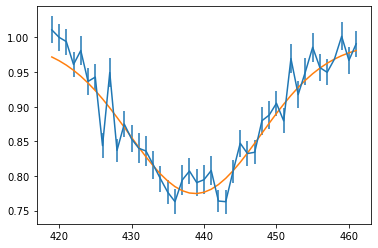

In [33]:
plt.errorbar(pix, fl, yerr=fle)
plt.plot(pix, neg_gaus(pix, *slon1.x))